上面的理论内容略显复杂，但其实 Word2Vec 真正应用的时候只需要调用 Python 的 gensim 库即可，安装过程如下：
在终端中输入以下命令：
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple gensim

一个简单的词向量训练流程，从数据准备（分词）到模型训练，再到获取训练结果（词汇表和词向量）。

为进一步使用词向量进行自然语言处理任务（如文本分类、语义相似度计算等）提供了基础。

In [1]:
!pip install gensim 
!pip install jieba 
!pip install matplotlib

In [2]:
import  jieba # jieba分词库，用于对中文文本进行分词处理。
# 准备训练数据
sentences  = [ 
    list(jieba.cut( '我喜欢吃苹果' )), 
    list(jieba.cut( '苹果很好吃' )), 
    list(jieba.cut( '水果是健康的' )), 
    list(jieba.cut( '梨子也很好吃' )), 
    list(jieba.cut( '我也喜欢吃凤梨' )), 
    list(jieba.cut( '苹果凤梨都是一种水果' )) , 
    list(jieba.cut( '苹果是一种又香又甜的水果' )), 
    list(jieba.cut( '梨子跟凤梨也是一种又香又甜的水果' )), 
]
sentences

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000gn/T/jieba.cache
Loading model cost 0.264 seconds.
Prefix dict has been built successfully.


[['我', '喜欢', '吃', '苹果'],
 ['苹果', '很', '好吃'],
 ['水果', '是', '健康', '的'],
 ['梨子', '也', '很', '好吃'],
 ['我', '也', '喜欢', '吃', '凤梨'],
 ['苹果', '凤梨', '都', '是', '一种', '水果'],
 ['苹果', '是', '一种', '又', '香', '又', '甜', '的', '水果'],
 ['梨子', '跟', '凤梨', '也', '是', '一种', '又', '香', '又', '甜', '的', '水果']]

In [3]:
# 使用gensim库中的Word2Vec模型来训练词向量，并获取训练后的词向量和词汇表
from gensim. models  import  Word2Vec

# 训练词向量模型
model = Word2Vec(sentences, window=5, min_count=1, workers=4)
# 获取所有词
vocab = model.wv.index_to_key
# 获取所有词向量
vectors = model.wv[vocab]
vectors

array([[-5.3630857e-04,  2.3646720e-04,  5.1041231e-03, ...,
        -7.0426278e-03,  9.0159255e-04,  6.3935029e-03],
       [-8.6233551e-03,  3.6638153e-03,  5.1871063e-03, ...,
        -2.3919728e-03, -9.5016956e-03,  4.5148465e-03],
       [ 8.8638728e-05,  3.0799997e-03, -6.8148547e-03, ...,
         5.1378825e-04,  8.2169194e-03, -7.0118154e-03],
       ...,
       [ 1.3001668e-03, -9.8043028e-03,  4.5877625e-03, ...,
        -2.5875687e-03, -7.7571664e-03,  4.1926014e-03],
       [ 1.8002307e-03,  7.0460914e-03,  2.9446983e-03, ...,
        -1.8595541e-03,  3.6117458e-03, -7.0364270e-03],
       [ 9.7315907e-03, -9.7780135e-03, -6.4999200e-03, ...,
        -2.7000697e-03,  3.8249956e-03,  3.3858197e-04]], dtype=float32)

使用Word2Vec类创建一个词向量模型model。

sentences是前面准备好的训练数据，即分词后的句子列表。

window=5：表示上下文窗口大小为 5，即在训练时，每个单词会考虑其前后 5 个单词的上下文信息来学习词向量。

min_count=1：表示单词在语料库中出现的最小次数为 1，即所有在训练数据中出现过的单词都会被纳入词汇表并学习其词向量。
如果设置为一个较大的值，如min_count=2，则只有在语料库中出现次数大于等于 2 的单词才会被学习词向量，出现次数小于 2 的单词将被忽略。

workers=4：指定使用 4 个线程来进行训练，以加快训练速度（每个人电脑配置不同，可以利用多核优势提高训练效率）。

In [4]:
import gensim

为了保证代码的可复现性，本案例利用《红楼梦》展示 Word2Vec 的基础应用。

In [5]:
# 导入第三方库
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib

# 数据预处理
f = open(r"/.../hongloumeng.txt",encoding='utf-8')
lines = []
for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        # 去除不必要字符
        i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
                            ~·@#￥%……&* ( ) '------------'；：‘]+","",i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[:3]) # 展示前三段的分词结果

/var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000gn/T/ipykernel_1652/2806360219.py:19: FutureWarning: Possible set difference at position 81
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
/var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000gn/T/ipykernel_1652/2806360219.py:19: FutureWarning: Possible set difference at position 83
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
/var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000gn/T/ipykernel_1652/2806360219.py:19: FutureWarning: Possible set difference at position 84
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
/var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000gn/T/ipykernel_1652/2806360219.py:19: FutureWarning: Possible set difference at position 86
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
/var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000gn/T/ipykernel_1652/2806360219.py:19: FutureWarning: Possible set difference at position 87
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
/var/folders/y2/q6f4m1d55pb7k1jrf54vy6kr0000g

[['第', '1', '章', '甄士隐', '梦幻', '识通灵', '贾雨村', '风尘', '怀', '闺秀'], ['此', '开卷', '第一回', '也'], ['作者', '自云', '因曾', '历过', '一番', '梦幻', '之后', '故', '将', '真事', '隐去', '而', '借', '通灵', '说', '撰此', '石头记', '一书', '也', '故曰', '甄士隐', '云云', '但书中', '所记', '何事', '何人', '自己', '又', '云', '今', '风尘碌碌', '一事无成', '忽', '念及', '当日', '所有', '之', '女子', '一一', '细考', '较', '去', '觉其', '行止', '见识', '皆', '出', '我', '之上', '我', '堂堂', '须眉', '诚不若', '彼', '裙钗', '我', '实愧', '则', '有', '馀', '悔', '又', '无益', '大', '无可如何', '之日', '也', '当此', '日', '欲', '将', '已往', '所赖', '天思祖德', '锦衣纨裤', '之', '时', '饫甘餍肥', '之', '日', '背', '父兄', '教育', '之恩', '负', '师友', '规训', '之德', '以致', '今日', '一技无成', '半生', '潦倒', '之罪', '编述', '一集', '以告', '天下', '知', '我', '之', '负罪', '固多', '然', '闺阁', '中', '历历', '有人', '万', '不可', '因', '我', '之', '不肖', '自护己', '短', '一并', '使', '其', '泯灭', '也', '所以', '蓬牖', '茅', '椽', '绳床瓦灶', '并', '不足', '妨', '我', '襟怀', '况', '那', '晨风', '夕', '月', '阶柳庭花', '更', '觉得', '润人', '笔墨', '我', '虽不学', '无文', '又', '何妨', '用', '假语', '村言', '敷', '演出', '来', '亦可', '使', '闺阁', '昭传', '复可破', '一时', '之闷

以下结果展示了经过训练后“林黛玉”词向量表示，“林黛玉”相似度前 10 的词语，以及“林黛玉”与“贾宝玉”的相似度。

In [6]:
# 调用 Word2Vec 建立模型
# 常用参数 
# vector_size: 词向量的维度;  
# window: 上下文窗口长度;  
# min_count: 少于该字段的次数的单词会被丢弃
model = Word2Vec(lines, vector_size = 20, window=3, min_count=3, \
                 epochs=7,negative=10) # 这里为了训练速度，对参数值设置较低

# 输入一个路径，保存训练好的模型，其中./data/model目录事先要存在
model.save("/.../word2vec_gensim")

# 查看 “林黛玉” 的词向量
print(model.wv.get_vector("林黛玉"))

# 查看与“林黛玉”最相近的前10个词
print(model.wv.most_similar('林黛玉',topn=10))

# 查看“林黛玉”与“贾宝玉”的相似度
print(model.wv.similarity('林黛玉', '贾宝玉'))

[-0.22708678 -0.36565667 -0.1746918  -0.06790829  0.02602956  0.09012236
  0.25116014  0.4338522  -0.3933376   0.13502185  0.5616601   0.2659147
  0.43680134  0.28223494  0.39516658  0.3727271  -0.5536858  -0.5659728
 -0.81592625 -0.99094623]
[('非常', 0.9822582602500916), ('自幼儿', 0.9815394878387451), ('采', 0.9812691807746887), ('柳湘莲', 0.9810888171195984), ('王仁', 0.980657696723938), ('这般光景', 0.9805225133895874), ('近前', 0.9802559614181519), ('尤三姐', 0.9802412986755371), ('松', 0.979546844959259), ('贾政因', 0.979155421257019)]
0.9584377


接下来，我们以更直观的画图形式展现 Word2Vec 模型结果。这里我们用到了 PCA 降维，主要是为了将多维词向量投影在二维平面上。

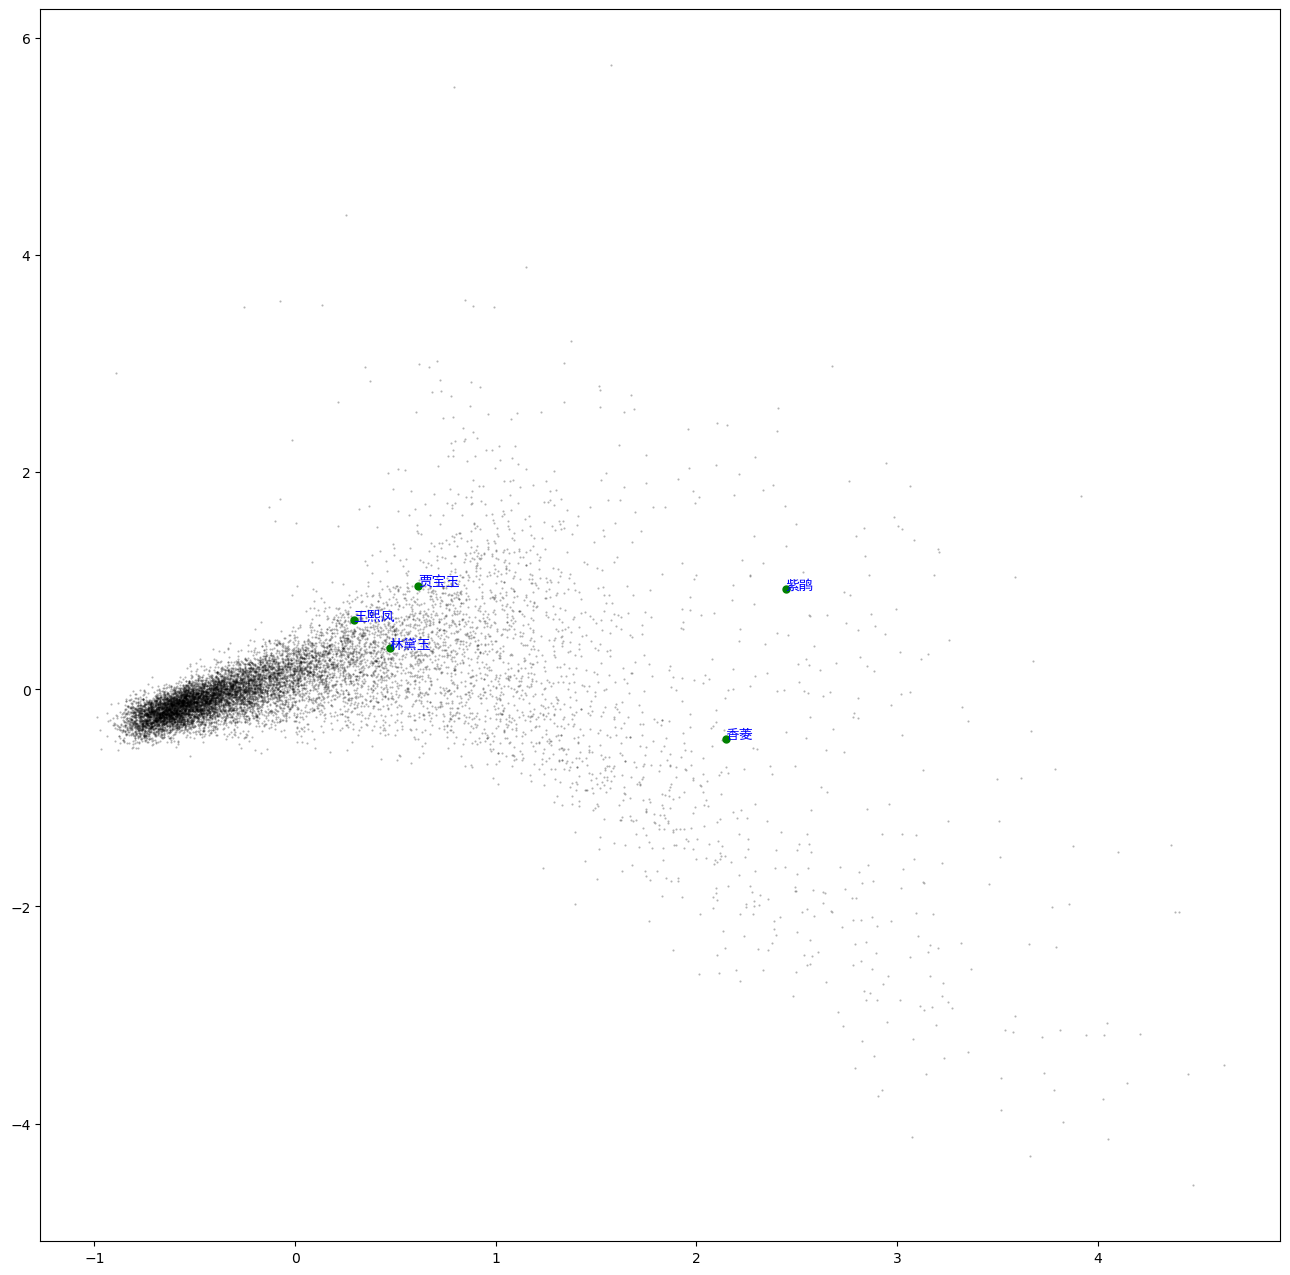

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

def plot_word_vectors(model, words_to_plot):
    rawWorVec = []
    word2ind = {}
    for i, w in enumerate(model.wv.index_to_key):
        rawWorVec.append(model.wv[w])
        word2ind[w] = i

    rawWorVec = np.array(rawWorVec)
    X_reduced = PCA(n_components=2).fit_transform(rawWorVec)

    fig = plt.figure(figsize=(16, 16))
    ax = fig.gca()
    ax.set_facecolor('white')
    ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize=1, alpha=0.3, color='black')

    # 查找系统中可用的中文字体
    font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    for font in font_list:
        if 'SimHei' in font:
            zhfont1 = fm.FontProperties(fname=font, size=10)
            break
    else:
        print("未找到 SimHei 字体，可能需要安装。")
        return

    for w in words_to_plot:
        if w in word2ind:
            ind = word2ind[w]
            xy = X_reduced[ind]
            plt.plot(xy[0], xy[1], '.', alpha=1, color='green', markersize=10)
            plt.text(xy[0], xy[1], w, alpha=1, color='blue', fontproperties=zhfont1)

    plt.show()

# 假设已经加载了词向量模型
# 这里需要根据实际情况加载模型，例如：
# from gensim.models import Word2Vec
# model = Word2Vec.load('your_model.bin')

words = ['紫鹃', '香菱', '王熙凤', '林黛玉', '贾宝玉']
plot_word_vectors(model, words)

上图展示了词向量可视化的结果，不难发现相似度高的词语距离比较近